# Deep Learning Project: Pet Classifier using CNN

Prepration
- Extract the ipynb file and the data in the same folder

Data Set
- A production grade program as 10,000 training images
- This is a small program with 20 images of cats and 20 images of dogs. 
- The evaluation set has 10 images of cats and 10 images of dogs

Runs
- The student is expected to run the 100-300 training step
- A production grade code would have about 20k-50k training steps

### Import modules

In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import sys

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

### Set hyper parameters
- Run the program with three num_steps : 100,200,300

In [11]:
reset_graph()

img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='./data/train'
testpath='./data/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=300 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

### Read the image dataset

length of train image set 40
X_data shape: (40, 32, 32, 3)
y_data shape: (40,)


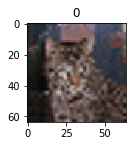

In [12]:
def read_images_classes(basepath,imgSize=img_size):
    image_stack = []
    label_stack = []

    for counter, l in enumerate(labels):
        path = os.path.join(basepath, l,'*g')
        for img in glob.glob(path):
            one_hot_vector =np.zeros(len(labels),dtype=np.int16)
            one_hot_vector[counter]=1
            image = cv2.imread(img)
            im_resize = cv2.resize(image,img_shape, interpolation=cv2.INTER_CUBIC)
            image_stack.append(im_resize)
            label_stack.append(labels[l])            
    return np.array(image_stack), np.array(label_stack)

X_train, y_train=read_images_classes(trainpath)
X_test, y_test=read_images_classes(testpath)

#test a sample image
print('length of train image set',len(X_train))
print('X_data shape:', X_train.shape)
print('y_data shape:', y_train.shape)

fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
img = cv2.resize(X_train[0],(64,64), interpolation=cv2.INTER_CUBIC)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(y_train[0])
plt.show()

In [13]:
y_train[0]

0

### Assignment: Define the tensorflow model

The model should have the following layers
- input later
- conv layer 1 with 32 filters of kernel  size[5,5],
- pooling layer 1 with pool size[2,2] and stride 2
- conv layer 2 with 64 filters of kernel  size[5,5],
- pooling layer 2 with pool size[2,2] and stride 2
- dense layer whose output size is fixed in the hyper parameter: fc_size=32
- drop out layer with droput probability 0.4
- predict the class by doing a softmax on the output of the dropout layers

Training
- For training fefine the loss function and minimize it
- For evaluation calculate the accuracy

Reading Material
- For ideas look at tensorflow layers tutorial

### The cnn_model_fn has to be defined here by the student

In [25]:
x = tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(tf.float32)

c_w1 = tf.Variable(initial_value=tf.random_normal(mean=0,stddev=0.1,shape=[5,5,1,16]), dtype=tf.float32)
c_b1 = tf.Variable(initial_value=np.zeros(16), dtype=tf.float32)
c_h1 = tf.nn.relu(tf.nn.conv2d(input=x, filter=c_w1, strides=[1,1,1,1], padding='VALID') + c_b1)
pool1 = tf.nn.max_pool(value=c_h1, ksize=[1,2,2,1], strides=[1,2,2,1],  padding='VALID')

c_w2 = tf.Variable(initial_value=tf.random_normal(mean=0,stddev=0.1,shape=[5,5,16,32]), dtype=tf.float32)
c_b2 = tf.Variable(initial_value=np.zeros(32), dtype=tf.float32)
c_h2 = tf.nn.relu(tf.nn.conv2d(input=pool1, filter=c_w2, strides=[1,1,1,1], padding='VALID') + c_b2)
pool2 = tf.nn.max_pool(value=c_h2, ksize=[1,2,2,1], strides=[1,2,2,1],  padding='VALID')

f = tf.contrib.layers.flatten(pool2)

fc_w1 = tf.Variable(initial_value=tf.random_normal(mean=0,stddev=0.1,shape=[512,64]), dtype=tf.float32)
fc_b1 = tf.Variable(initial_value=np.zeros(64), dtype=tf.float32)
fc_h1 = tf.nn.relu(tf.matmul(f,fc_w1) + fc_b1)

fc_w2 = tf.Variable(initial_value=tf.random_normal(mean=0,stddev=0.1,shape=[64,10]), dtype=tf.float32)
fc_b2 = tf.Variable(initial_value=np.zeros(10), dtype=tf.float32)
drop_out = tf.nn.dropout(fc_h1, keep_prob)
logits = tf.matmul(drop_out,fc_w2) + fc_b2
# logits = tf.matmul(fc_h1,fc_w2) + fc_b2

In [26]:
y = tf.placeholder(dtype=tf.int64)
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits) # No need of onehot encodings

correct_prediction = tf.equal(tf.argmax(logits, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


optim = tf.train.AdamOptimizer(learning_rate=0.001)
trainer = optim.minimize(loss)

In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [28]:
epochs = 100

for i in range(epochs):
    sess.run([trainer], feed_dict={x:X_train/255., y:y_train, keep_prob:0.6})
    [acc, l] = sess.run([accuracy, loss], feed_dict={x:X_train/255., y:y_train, keep_prob:1})
    
    if i%5==0:
        print('Epoch %d - Loss: | %.2f Accuracy: %.2f'%(i,np.mean(l),acc))

UnimplementedError: Generic conv implementation does not support grouped convolutions for now.
	 [[node Conv2D_8 (defined at <ipython-input-25-7dfdcb4e6695>:6)  = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_10_0_0, Variable_29/read)]]

Caused by op 'Conv2D_8', defined at:
  File "C:\Users\mehul\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\mehul\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\mehul\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\mehul\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\mehul\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\mehul\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\mehul\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\mehul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-7dfdcb4e6695>", line 6, in <module>
    c_h1 = tf.nn.relu(tf.nn.conv2d(input=x, filter=c_w1, strides=[1,1,1,1], padding='VALID') + c_b1)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 956, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\mehul\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

UnimplementedError (see above for traceback): Generic conv implementation does not support grouped convolutions for now.
	 [[node Conv2D_8 (defined at <ipython-input-25-7dfdcb4e6695>:6)  = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_10_0_0, Variable_29/read)]]
